In [55]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive
from scipy.fftpack import fft, ifft,ifftshift,fftshift

In [127]:
def Create_circulant_slow(array_elements):
    N=len(array_elements)
    T=np.zeros((N,N))
    for i in range(N-1):
        T[i+1,i]=1
    T[0,N-1]=1
    circulant_matrix=array_elements[0]*np.eye(N)
    result=T
    for i in range(1,N):
        circulant_matrix+=result*array_elements[i]
        result=np.matmul(result,T)
    return circulant_matrix

def Create_circulant(array_elements):
    N=len(array_elements)
    if N%2==0:
        array_elements=np.roll(array_elements,N//2)
    else:
        array_elements=np.roll(array_elements,N//2+1)
    circulant=[]
    for i in range(N):
        circulant.append(np.roll(array_elements,i))
    return np.array(circulant)

def Create_anti_circulant(array_elements):
    N=len(array_elements)
    if N%2==0:
        array_elements=np.roll(array_elements,N//2)
    else:
        array_elements=np.roll(array_elements,N//2+1)
    circulant=[]
    for i in range(N):
        circulant.append(np.roll(array_elements[::-1],-i))
    return np.array(circulant)


N_size=40 #
Gamma=0.5
Lambda=0.5

# ---------------------------------------------------

def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return -Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))

# Test 

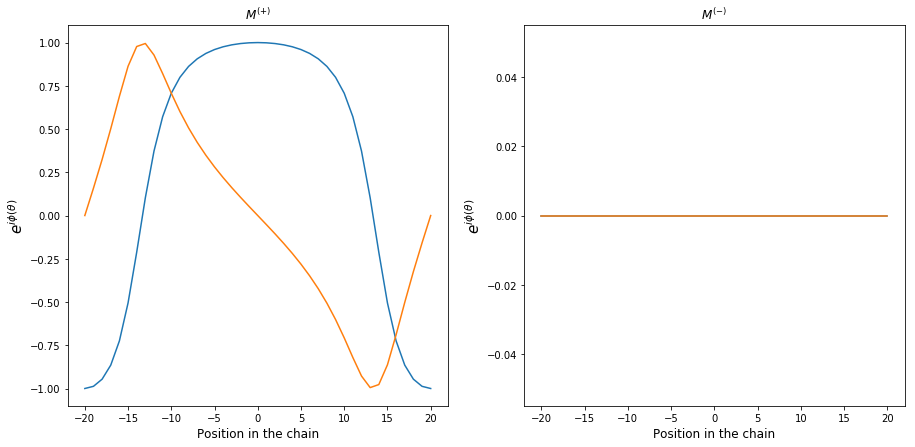

In [143]:
M_plus=1
M_minous=0
if N_size%2==0:
    x=np.arange(-(N_size)/2,(N_size)/2+1)
else:
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
Mplusband=M_plus*np.array(Mplusband)
Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
Mminousband=M_minous*np.array(Mminousband)


plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(x,Mplusband.real,label="real part")
plt.plot(x,Mplusband.imag,label="imaginary part")
plt.title(r"$M^{(+)}$")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$e^{i\phi(\theta)}$",fontsize=15)
plt.subplot(1,2,2)
plt.plot(x,(Mminousband).real,label="real part")
plt.plot(x,(Mminousband).imag,label="imaginary part")
plt.title(r"$M^{(-)}$")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$e^{i\phi(\theta)}$",fontsize=15)
plt.show()

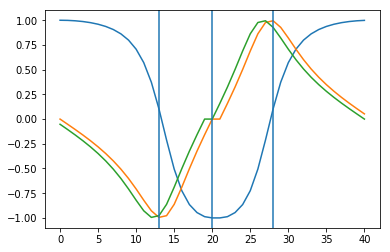

In [144]:
plt.plot(ifftshift(Mplusband).real)
plt.plot(ifftshift(Mplusband).imag)
plt.plot(-ifftshift(Mplusband).imag[::-1])
plt.axvline(x=np.argmax(ifftshift(Mplusband).imag))
plt.axvline(x=np.argmin(ifftshift(Mplusband).imag))
plt.axvline(x=np.argmin(ifftshift(Mplusband).real))

In [145]:
np.argmax(ifftshift(Mplusband).imag),np.argmin(ifftshift(Mplusband).imag)

(28, 13)

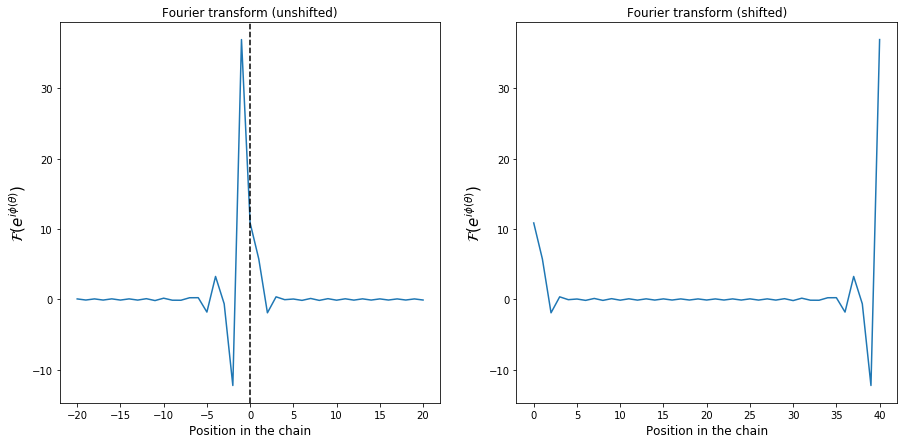

In [146]:
Fourier_Transform_fft=fft(ifftshift(Mplusband))
Fourier_Transform_ifft=fftshift(fft(ifftshift(Mplusband)))


plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(x,Fourier_Transform_ifft.real,label="real part")
plt.title(r"Fourier transform (unshifted)")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$\mathcal{F} (e^{i\phi(\theta)})$",fontsize=15)
plt.axvline(x=0,color="k",linestyle="--")
plt.subplot(1,2,2)
x=np.arange(N_size+1)
plt.plot(x,Fourier_Transform_fft.real,label="real part")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$\mathcal{F} (e^{i\phi(\theta)})$",fontsize=15)
plt.title(r"Fourier transform (shifted)")
plt.show()

In [147]:
np.argmax(Fourier_Transform_ifft)

19

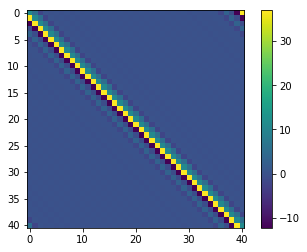

In [148]:
plt.imshow(Create_circulant(Fourier_Transform_ifft).real)
plt.colorbar()
plt.show()

In [111]:
N_size=10
if N_size%2==0:
    x=np.arange(-(N_size)/2,(N_size)/2+1)
else:
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

In [112]:
x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])